**Forecast the amount of courier partners Project**





**While utilizing this data for predictions, it's essential to acknowledge a key consideration. The reliability of our prediction results may be limited due to a significant factor — all the information utilized by our model originates from the future. For instance, when forecasting tomorrow's partners number, crucial details such as the temperature, relative_humidity and, precipitation for the next day are unavailable at the time of prediction. Hence, it's imperative to exercise caution in interpreting and trusting the model's predictions. Decisions should be made with a clear understanding of this inherent limitation, ensuring that reliance on the model aligns with the available knowledge and the temporal constraints of the predictive features.**

In the subsequent analysis, diverse machine learning techniques, including deep learning, were employed to construct the model. Certain methods exhibit exceptional performance, raising concerns about potential overfitting. Among these approaches, my preferred model is rooted in deep learning.


### Step 1: Observing the Data Content
**table_summary** function is a utility for quickly summarizing key information about a DataFrame, focusing on missing values, data types, and unique values in categorical columns. It is particularly useful to understand the structure and content of the dataset.

We have a well-maintained dataset with no categorical variables. The missing data is minimal, accounting for less than 1% of the entire dataset. Considering that the missing values pertain to non-critical information and do not involve sensitive data, we have decided to drop these instances. The rest of the data is clean, requiring no further preprocessing, and is ready for immediate use.

In [122]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [123]:
def table_summary(df, num=0):
    isnull = df.isnull().sum()
    data_types = df.dtypes
    # Calculate the percentage of missing values
    percent_missing = (isnull / len(df))
    dc = pd.DataFrame({'isnull': isnull, 'type': data_types, '%per': percent_missing, 'nunique':df.nunique()})
    dc['%per'] = dc['%per'].apply('{:.3f}'.format)
    dc = dc.sort_values(['%per', 'nunique'], ascending=False)
    print(f'1. Table shape: {df.shape}.')
    print(20*'--')
    s = (df.dtypes == 'object')
    object_cols = list(s[s].index)
    print(f"2. Categorical variables: {object_cols}")
    print(20*'--')
    if num:
        for i , col in enumerate(object_cols):
            print(f'{i+1}.3. Unique value in {col}:')
            print(df[col].unique())
            print()
        print(45*'--')
    else:
        print('3. Call the table_summary(df, 1) function to view all unique data in the category columns.')
        print(45*'--')
    print('4. Table_Null_per%')
    print(dc)

In [124]:
df1 = pd.read_csv('daily_cp_activity_dataset.csv')
df = df1.iloc[:,1:]

In [125]:
table_summary(df)

1. Table shape: (761, 4).
----------------------------------------
2. Categorical variables: []
----------------------------------------
3. Call the table_summary(df, 1) function to view all unique data in the category columns.
------------------------------------------------------------------------------------------
4. Table_Null_per%
                         isnull     type   %per  nunique
temperature                  30  float64  0.039      650
precipitation                 5  float64  0.007      205
relative_humidity             0  float64  0.000       58
courier_partners_online       0    int64  0.000       54


In [126]:
df_cleaned = df.dropna()
df_cleaned.head(3)

,courier_partners_online,temperature,relative_humidity,precipitation
0,49,18.27,0.57,0.0
1,927,19.88,0.55,0.0
2,40,16.88,0.60,0.0


### Step  2: Data Splitting and Normalization
I chose to allocate 80% of the data for training. To ensure consistency in scaling, I applied MinMaxScaler().

In [127]:
X = df_cleaned.iloc[:,1:]
y = df_cleaned.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1550)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Step 3.1: Training and Evaluation Process(Method: Neural Network)



I create a two-layer neural network with TensorFlow's Keras API:

  * First layer: 32 units with ReLU activation.
  * Second layer: 1 unit with linear activation.


* **Optimization and Compilation:** I choose the Adam optimizer with a learning rate of 0.01. I compile the model using Mean Squared Error (MSE) loss and monitor Mean Absolute Error (MAE).

* **Early Stopping:** To prevent overfitting, I implement early stopping by monitoring validation loss. Training stops if there's no improvement for 10 epochs.

* **Model Training:** I train the model on X_train and y_train for 100 epochs. The batch size is set to 32, and the data is shuffled during training.





In [128]:
# Define a neural network model with two layers using the Sequential API
model = Sequential([
    # First layer with ReLU activation
    Dense(units=32, input_shape=(3,), activation='relu'),
    # Output layer with linear activation
    Dense(units=1, activation='linear')
])

# Configure the model with Adam optimizer, MSE loss, and MAE as a monitoring metric
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Implement early stopping to monitor validation loss and stop training if no improvement after 10 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model on the provided data (X_train, y_train) with validation data (X_test, y_test)
ax = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
               batch_size=2**5, epochs=100, shuffle=True, verbose=1, callbacks=[callback])


Epoch 1/100
19/19 [==============================] - 0s 5ms/step - loss: 386.6235 - mae: 17.5847 - val_loss: 333.1379 - val_mae: 16.0960
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 288.8518 - mae: 14.9263 - val_loss: 214.0985 - val_mae: 12.6042
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 182.0939 - mae: 11.6360 - val_loss: 114.0146 - val_mae: 9.2609
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 109.3305 - mae: 8.8325 - val_loss: 68.8677 - val_mae: 6.8522
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 68.3309 - mae: 6.6164 - val_loss: 41.5682 - val_mae: 5.2028
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 41.2901 - mae: 4.9693 - val_loss: 22.0083 - val_mae: 3.7166
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 23.4421 - mae: 3.6547 - val_loss: 10.6684 - val_mae: 2.6085
Epoch 8/100
19/19 [==============================] - 0s 1

In [129]:
results = model.evaluate(x=X_test, y=y_test)

5/5 [==============================] - 0s 476us/step - loss: 5.8747e-06 - mae: 0.0019


In [130]:
print(f'Loss: {results[0]:.5f} and MAE: {results[1]:.5f}')

Loss: 0.00001 and MAE: 0.00185


In [131]:
def plot(history):
    # Create a 1x3 subplot layout with a total figure size of (18, 5)
    plt.subplots(1, 3, figsize=(18, 5))

    # Plot the training loss and mean absolute error in the first subplot
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['mae'], label='Mean Absolute Error')
    plt.title('Train Data'), plt.xlabel('Epoch'), plt.ylabel('Loss & MAE')
    plt.legend()

    # Plot the comparison of training and testing loss in the second subplot
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title('Loss (compare train & test)'), plt.xlabel('Epoch'), plt.ylabel('Loss')
    plt.legend()

    # Plot the comparison of training and testing mean absolute error in the third subplot
    plt.subplot(1, 3, 3)
    plt.plot(history.history['mae'], label='Train')
    plt.plot(history.history['val_mae'], label='Test') 
    plt.title('Mean Absolute Error (compare train & test)'), plt.xlabel('Epoch'), plt.ylabel('MAE')
    plt.legend()

    # Display the subplots
    plt.show()


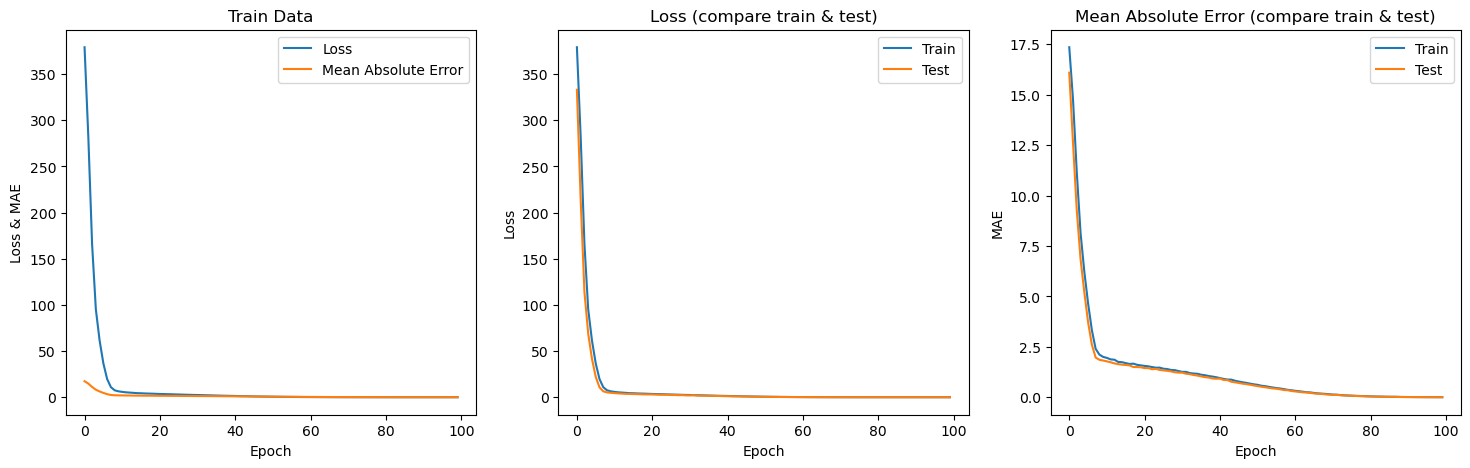

In [132]:
plot(ax)

### Step 3.2: Training and Evaluation Process(Method:  ensemble of machine learning models, 6 models)

**"create_model"** function takes a pre-configured regression model, trains it on the provided training data, makes predictions on the test data, and then prints key performance metrics (MAE, MSE, R2) to evaluate the model's effectiveness. It's designed to simplify the process of assessing various regression models by providing concise performance summaries. The function is then used to evaluate different models such as Lasso, Ridge, SVR, Linear Regression, RandomForestRegressor, and GradientBoostingRegressor.

In [133]:
def create_model(model_function, model_name, X_train, X_test, y_train, y_test):
    # Create a model using the specified model function
    model = model_function
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print model performance metrics: MAE, MSE, and R-squared
    print('Model name:', model_name)
    print(f'MAE: {mae:.2f}')
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse:.2f}')
    
    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2:.2f}')
    print()


In [134]:
create_model(Lasso(alpha=1.0), 'Lasso', X_train, X_test, y_train, y_test)
create_model(Ridge(alpha=1.0), 'Ridgel', X_train, X_test, y_train, y_test)
create_model(SVR(kernel='linear'), 'SVR', X_train, X_test, y_train, y_test)
create_model(LinearRegression(), 'LinearRegression', X_train, X_test, y_train, y_test)
create_model(RandomForestRegressor(n_estimators=100), 'RandomForestRegressor', X_train, X_test, y_train, y_test)
create_model(GradientBoostingRegressor(n_estimators=100), 'GradientBoostingRegressor', X_train, X_test,y_train,y_test)

Model name: Lasso
MAE: 3.56
MSE: 21.41
R-squared: 0.77

Model name: Ridgel
MAE: 0.54
MSE: 0.41
R-squared: 1.00

Model name: SVR
MAE: 0.44
MSE: 0.31
R-squared: 1.00

Model name: LinearRegression
MAE: 0.00
MSE: 0.00
R-squared: 1.00

Model name: RandomForestRegressor
MAE: 0.04
MSE: 0.00
R-squared: 1.00

Model name: GradientBoostingRegressor
MAE: 0.08
MSE: 0.01
R-squared: 1.00



### Observation and Conclusion

#### Positive aspect

* Lasso 
    * Positive aspect: Decent performance with R2 of 0.77.
    * Negative aspect: Room for improvement in MAE and MSE.

* Ridge
    * +: Excellent performance with perfect R2 (1.00). 
    * -: Potential overfitting with suspiciously perfect scores.

* SVR 
    * +: Very good performance with perfect R2 (1.00). 
    * -: Possible overfitting concerns.

* Linear Regression 
    * +: Astounding perfect scores. 
    * -: Unusual and raises suspicions of potential issues.(overfitting, ..)

* Random Forest Regressor 
    * +: Excellent performance with perfect R2 (1.00). 
    * -: Prone to overfitting if not properly tuned.

* Gradient Boosting Regressor
    * +: Excellent performance with perfect R2 (1.00).
    * -: Potential risk of overfitting.

* Neural Network
    * +: Very low loss and MAE, indicating good performance.
    * -: Context needed; comparison with other models is necessary.
